In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

https://www.juntadeandalucia.es/organismos/saludyfamilias/actualidad/noticias.html

In [2]:
filename = 'covid19-es-and.csv'
fecha = '17/04/2020'
url = 'https://www.juntadeandalucia.es/organismos/saludyfamilias/actualidad/noticias/detalle/234667.html'

In [3]:
# Load
tables = pd.read_html(url, header=0, thousands='.')
assert len(tables) > 0
dfL = tables[0]
dfL.set_index(['Provincia'], inplace=True)
dfL

,Positivo,Hospitalización,UCI,Fallecimientos,Curados
Provincia,,,,,
Almería,436,186,35,39,118
Cádiz,1110,466,73,71,276
Córdoba,1259,486,64,70,317
Granada,1956,1018,117,191,513
Huelva,352,201,29,29,89
Jaén,1233,612,62,129,252
Málaga,2429,1317,157,214,809
Sevilla,2278,1012,138,197,416
Total,11053,5298,675,940,2790


In [6]:
# Prepare
provincias = ['Almería', 'Cádiz', 'Córdoba', 'Granada', 'Huelva', 'Jaén', 'Málaga', 'Sevilla', 'Total']
dfP = pd.DataFrame(0, index=provincias, columns=['Ingresados','Altas', 'Bajas'])

dfP['Ingresados'] = dfL['Hospitalización']
dfP['Altas'] = dfL['Curados']
dfP['Bajas'] = dfL['Fallecimientos']
dfP['Fecha'] = fecha

dfP

,Ingresados,Altas,Bajas,Fecha
Almería,186,118,39,17/04/2020
Cádiz,466,276,71,17/04/2020
Córdoba,486,317,70,17/04/2020
Granada,1018,513,191,17/04/2020
Huelva,201,89,29,17/04/2020
Jaén,612,252,129,17/04/2020
Málaga,1317,809,214,17/04/2020
Sevilla,1012,416,197,17/04/2020
Total,5298,2790,940,17/04/2020


In [7]:
# Save to csv
dfP.to_csv(filename, encoding='utf-8', header=False, mode='+a', index_label='Provincia')

In [8]:
# Load full csv
dfCSV = pd.read_csv(filename, index_col='Provincia', thousands='.')

In [9]:
# Select & calc
title = 'COVID19 Andalucía'
total = dfCSV.loc['Total']['Ingresados'].pct_change() * 100
huelva = dfCSV.loc['Huelva']['Ingresados'].pct_change() * 100
malaga  = dfCSV.loc['Málaga']['Ingresados'].pct_change() * 100
# x Axis
xA = dfCSV.loc['Total']['Fecha']

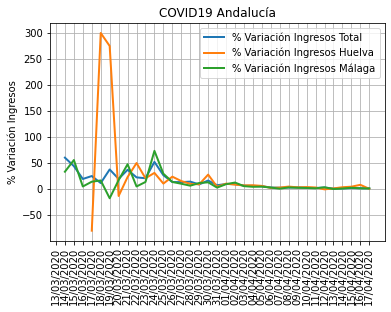

In [10]:
# Draw 
plt.plot(xA, total, label='% Variación Ingresos Total', linewidth=2)
plt.plot(xA, huelva, label='% Variación Ingresos Huelva', linewidth=2)
plt.plot(xA, malaga, label='% Variación Ingresos Málaga', linewidth=2)
plt.title(title)
plt.ylabel('% Variación Ingresos')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend()
plt.show()

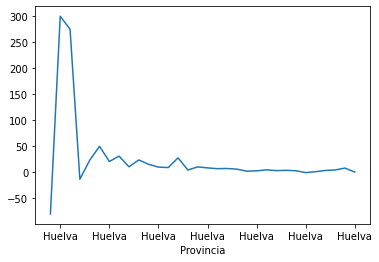

In [11]:
huelva.plot()

In [12]:
huelva.tail()

Provincia
Huelva    1.183432
Huelva    3.508772
Huelva    4.519774
Huelva    8.108108
Huelva    0.500000
Name: Ingresados, dtype: float64